# heapq Module

For problems that involve finding the best element in a dataset, **heaps** and **priority queues** offer a solution that's easy to use and highly effective.

## Heaps and Priority queues
- Heaps are **concrete** data structures. [defines implementation]
- Priority Queues are **abstract** data structures. [defines interface]

Concrete data structures specify performance guarantees (define relationship between the size of the structure and the time operations take)

Abstract data structures specify operations and the relationships between them.

The priority queue abstract data structure supports 3 operations:
- *is_empty* checks whether the queue is empty.
- *add_element* adds an element to the queue.
- *pop_element* pops the element with the highest priority.

- Priority Queues are commonly used for optimizing task execution, in which the goal is to work on the task with the highest priority. After a task is completed, its priority is lowered, and it's returned to the queue.
    - There are 2 different conventions for determining the priority of an element:
        - The largest element has the highest priority
        - The smallest element has the highest priority

The Python *heapq* module uses the second convention (smallest element has highest priority)

The heap implementation of the priority queue guarantees that both pushing (adding) and popping (removing) elements are *logarithmic* time operations.

## Implementation of Heaps

- A heap implements a priority queue as a **complete binary tree**.
- In a binary tree, each node will have at most 2 children.
- In a complete binary tree, all levels except possibly the deepest one are full at all times.
- If the deepest level is incomplete, then it will have the nodes as far to the left as possible.

- In a heap tree, the value in a node is always smaller than both of its children. This is called the **heap property**. 
- This is different from a Binary Search Tree, in which only the left node will be smaller than the value of its parent.

## Use Cases

We can use a priority queue for any of the following tasks:

- Getting the three most popular blog posts from hit data
- Finding the fastest way to get from one point to the other
- Predicting which bus will be the first to arrive at a station based on arrival frequency
- Scheduling emails, each of which needs to be sent at a certain frequency.

**heaps can be implemented as a list.**
There are three rules that determine the relationship between the element at the index k and its surrounding elements:

- Its first child is at 2*k + 1.
- Its second child is at 2*k + 2.
- Its parent is at (k - 1) // 2.


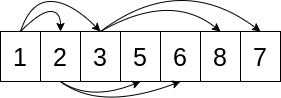

In [1]:
# Basic Operations
import heapq
a = [3,5,1,2,6,8,7]
heapq.heapify(a) # modifies list in-place but doesn't sort it
a

[1, 2, 3, 5, 6, 8, 7]

In [2]:
a = [1,2,3,5,6,8,7]
heapq.heappop(a)

1

In [3]:
a

[2, 5, 3, 7, 6, 8]

In [4]:
a = [2,5,3,7,6,8]
heapq.heappush(a,4)
a

[2, 5, 3, 7, 6, 8, 4]

In [5]:
heapq.heappop(a)

2

In [6]:
heapq.heappop(a)

3

In [8]:
heapq.heappop(a)

4

The Python heapq module also defines two more operations:

- heapreplace() is equivalent to heappop() followed by heappush().
- heappushpop() is equivalent to heappush() followed by heappop().

## Email Scheduler Implementation

In [9]:
import datetime
import heapq

def email(frequency, details):
    current = datetime.datetime.now()
    while True:
        current += frequency
        yield current, details
    
fast_email = email(datetime.timedelta(minutes=15), "fast email")
slow_email = email(datetime.timedelta(minutes=40), "slow email")

unified = heapq.merge(fast_email, slow_email)

In [10]:
for i in range(10):
    next_email = next(unified)
    print(f"Email {i + 1}: {next_email}")

Email 1: (datetime.datetime(2023, 11, 17, 8, 15, 11, 124589), 'fast email')
Email 2: (datetime.datetime(2023, 11, 17, 8, 30, 11, 124589), 'fast email')
Email 3: (datetime.datetime(2023, 11, 17, 8, 40, 11, 124589), 'slow email')
Email 4: (datetime.datetime(2023, 11, 17, 8, 45, 11, 124589), 'fast email')
Email 5: (datetime.datetime(2023, 11, 17, 9, 0, 11, 124589), 'fast email')
Email 6: (datetime.datetime(2023, 11, 17, 9, 15, 11, 124589), 'fast email')
Email 7: (datetime.datetime(2023, 11, 17, 9, 20, 11, 124589), 'slow email')
Email 8: (datetime.datetime(2023, 11, 17, 9, 30, 11, 124589), 'fast email')
Email 9: (datetime.datetime(2023, 11, 17, 9, 45, 11, 124589), 'fast email')
Email 10: (datetime.datetime(2023, 11, 17, 10, 0, 11, 124589), 'fast email')


*fast email* is scheduled every 15 minutes, the *slow email* is scheduled every 40, and the emails are properly interleaved so that they’re arranged in the order of their timestamps.

**We can also use heaps to identify the top n or bottom n things**

In [11]:
import heapq

results="""\
Christania Williams      11.80
Marie-Josee Ta Lou       10.86
Elaine Thompson          10.71
Tori Bowie               10.83
Shelly-Ann Fraser-Pryce  10.86
English Gardner          10.94
Michelle-Lee Ahye        10.92
Dafne Schippers          10.90
"""

top_3 = heapq.nsmallest(
    3, results.splitlines(), key=lambda x: float(x.split()[-1])
)
print("\n".join(top_3))

Elaine Thompson          10.71
Tori Bowie               10.83
Marie-Josee Ta Lou       10.86
